In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('C:\\Users\\aman1\\OneDrive\\Desktop\\data science\\Domain projects\\HR projects\\Hr_data1.csv')

In [3]:
data.head()

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,Yes,Travel_Rarely,35 - 44,Ex-Employees,Sales,Life Sciences,STAFF-1,1,Female,Sales Executive,...,3,1,80,0,8,1,6,4,0,5
1,No,Travel_Frequently,45 - 54,Current Employees,R&D,Life Sciences,STAFF-2,2,Male,Research Scientist,...,4,4,80,1,10,3,10,7,1,7
2,Yes,Travel_Rarely,35 - 44,Ex-Employees,R&D,Other,STAFF-4,4,Male,Laboratory Technician,...,3,2,80,0,7,3,0,0,0,0
3,No,Travel_Frequently,25 - 34,Current Employees,R&D,Life Sciences,STAFF-5,5,Female,Research Scientist,...,3,3,80,0,8,3,8,7,3,0
4,No,Travel_Rarely,25 - 34,Current Employees,R&D,Medical,STAFF-7,7,Male,Laboratory Technician,...,3,4,80,1,6,3,2,2,2,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Attrition                   1470 non-null   object
 1   Business Travel             1470 non-null   object
 2   CF_age band                 1470 non-null   object
 3   CF_attrition label          1470 non-null   object
 4   Department                  1470 non-null   object
 5   Education Field             1470 non-null   object
 6   emp no                      1470 non-null   object
 7   Employee Number             1470 non-null   int64 
 8   Gender                      1470 non-null   object
 9   Job Role                    1470 non-null   object
 10  Marital Status              1470 non-null   object
 11  Over Time                   1470 non-null   object
 12  Over18                      1470 non-null   object
 13  Training Times Last Year    1470 non-null   int6

In [5]:
missing_value = data.isnull().mean()*100
missing_value

Attrition                     0.0
Business Travel               0.0
CF_age band                   0.0
CF_attrition label            0.0
Department                    0.0
Education Field               0.0
emp no                        0.0
Employee Number               0.0
Gender                        0.0
Job Role                      0.0
Marital Status                0.0
Over Time                     0.0
Over18                        0.0
Training Times Last Year      0.0
Age                           0.0
CF_current Employee           0.0
Daily Rate                    0.0
Distance From Home            0.0
Education                     0.0
Employee Count                0.0
Environment Satisfaction      0.0
Hourly Rate                   0.0
Job Involvement               0.0
Job Level                     0.0
Job Satisfaction              0.0
Monthly Income                0.0
Monthly Rate                  0.0
Num Companies Worked          0.0
Percent Salary Hike           0.0
Performance Ra

In [6]:
int_col = data.select_dtypes(include = ['int64'])
obj_col = data.select_dtypes(include = ['object'])

In [7]:
for i in int_col:
    print(f'the unique column in {i} is :',int_col[i].unique(),sep='\n')
    print('-------------------------------------------------------------')

the unique column in Employee Number is :
[   1    2    4 ... 1667 1878 1702]
-------------------------------------------------------------
the unique column in Training Times Last Year is :
[0 3 2 5 1 4 6]
-------------------------------------------------------------
the unique column in Age is :
[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
-------------------------------------------------------------
the unique column in CF_current Employee is :
[0 1]
-------------------------------------------------------------
the unique column in Daily Rate is :
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 

In [8]:
for o in obj_col:
    print(f'the unique column in {o} is :',obj_col[o].unique(),sep='\n')
    print('-----------------------------------------------------------')

the unique column in Attrition is :
['Yes' 'No']
-----------------------------------------------------------
the unique column in Business Travel is :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
-----------------------------------------------------------
the unique column in CF_age band is :
['35 - 44' '45 - 54' '25 - 34' 'Over 55' 'Under 25']
-----------------------------------------------------------
the unique column in CF_attrition label is :
['Ex-Employees' 'Current Employees']
-----------------------------------------------------------
the unique column in Department is :
['Sales' 'R&D' 'HR']
-----------------------------------------------------------
the unique column in Education Field is :
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
-----------------------------------------------------------
the unique column in emp no is :
['STAFF-1' 'STAFF-2' 'STAFF-4' ... 'STAFF-1667' 'STAFF-1878' 'STAFF-1702']
-------------------------------

## Attrition Analysis

### ●	What is the overall attrition rate in the company?

In [9]:
attrition_count = data['Attrition'].value_counts()['Yes']
attrition_count

237

In [10]:
total_employee = len(data['Attrition'])
total_employee

1470

In [11]:
attrition_rate = (attrition_count / total_employee) * 100
print(f'The attrition rate is : {attrition_rate:.2f}%')

The attrition rate is : 16.12%


### ●	Is there a significant difference in attrition rates between different age bands or departments?

In [12]:
data['Attrition'] = np.where(data['Attrition'] == 'Yes',1,0)

In [13]:
x_data = data['Attrition'].value_counts()
x_data

0    1233
1     237
Name: Attrition, dtype: int64

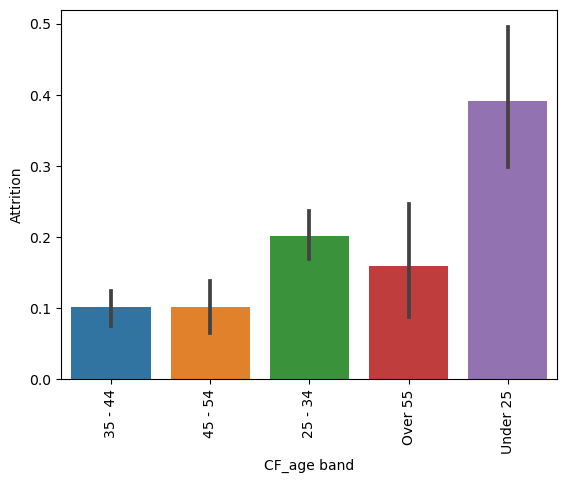

In [14]:
sns.barplot(x ='CF_age band' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

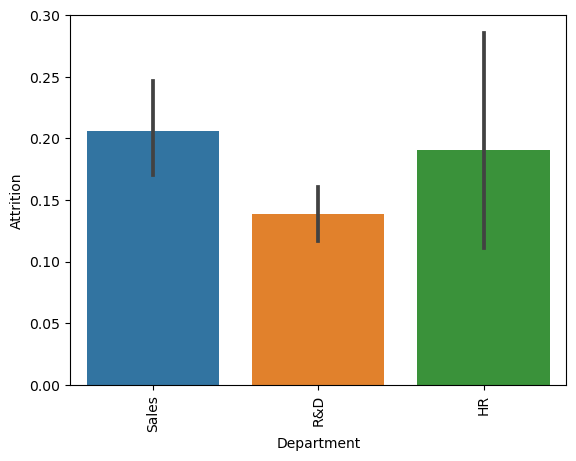

In [15]:
sns.barplot(x ='Department' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Are employees who travel frequently more likely to leave the company compared to those who travel rarely?

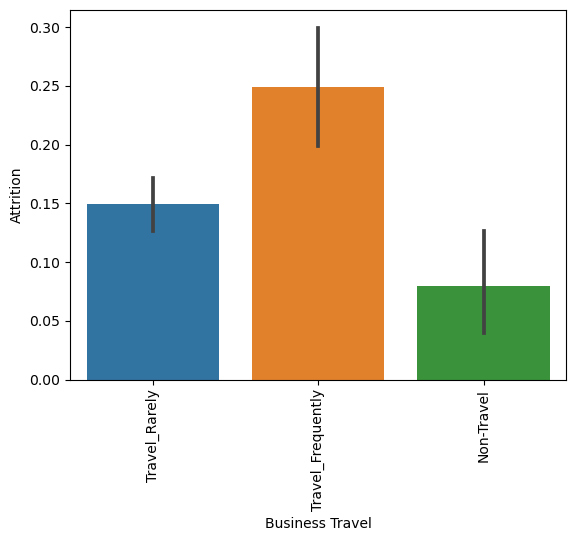

In [16]:
sns.barplot(x ='Business Travel' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Does the presence of overtime have any correlation with attrition?

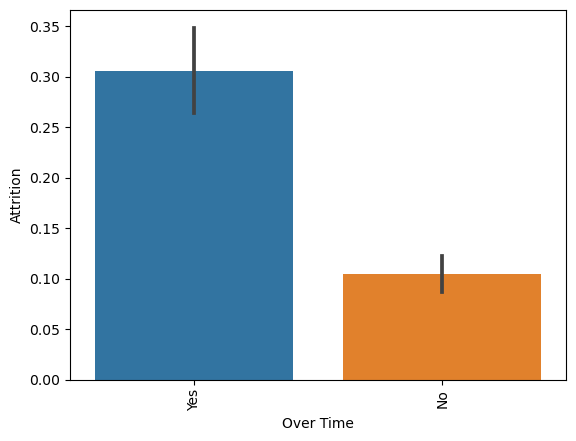

In [17]:
sns.barplot(x ='Over Time' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

In [18]:
data['Over Time'] = np.where(data['Over Time']=='Yes',1,0)

In [19]:
correlation,p_value = pointbiserialr(data['Over Time'],data['Attrition'])

In [20]:
print(f"Point-biserial correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Point-biserial correlation coefficient: 0.2461179942458044
P-value: 1.009254033656135e-21


### The point-biserial correlation coefficient of 0.246 suggests a positive correlation between overtime and attrition.
### This means that as overtime increases, the likelihood of attrition also tends to increase.

## 2. Employee Demographics:

### ●	What is the gender distribution among employees?

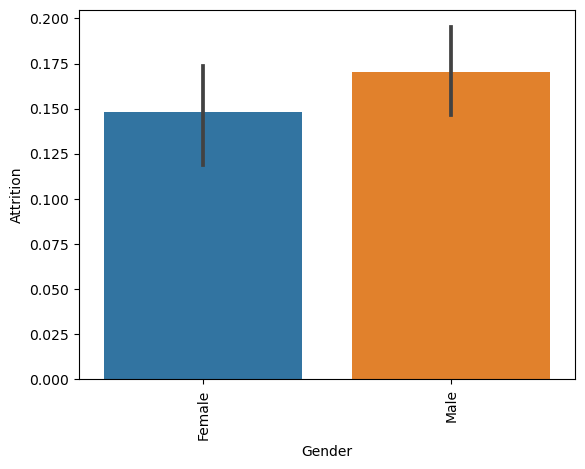

In [21]:
sns.barplot(x ='Gender' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	How does the marital status of employees impact their job satisfaction or attrition?

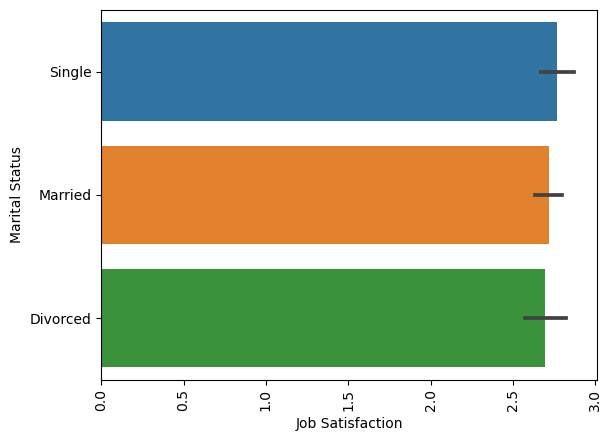

In [22]:
sns.barplot(x ='Job Satisfaction' ,y = 'Marital Status',data = data)
plt.xticks(rotation = 90)
plt.show()

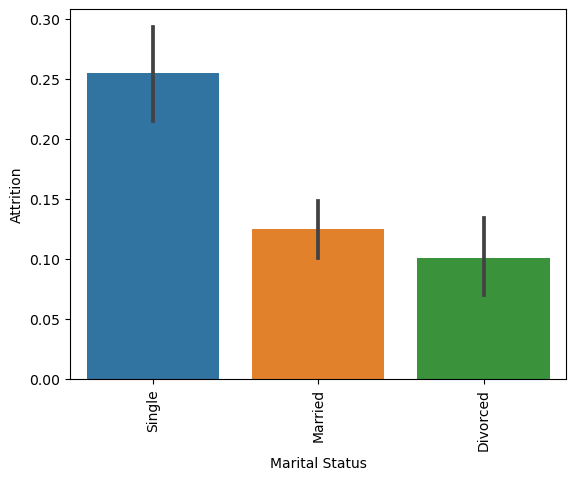

In [23]:
sns.barplot(x ='Marital Status' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Are there any differences in attrition rates based on education fields or levels?

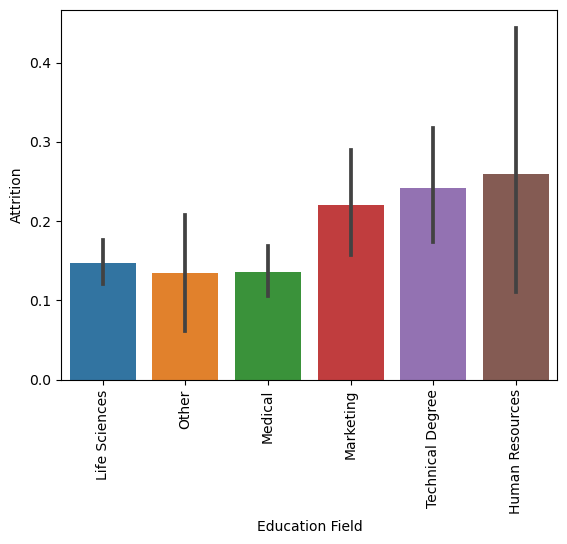

In [24]:
sns.barplot(x ='Education Field' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

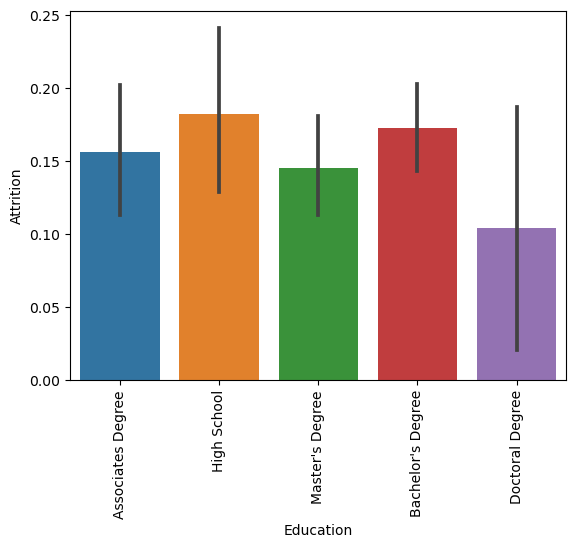

In [25]:
sns.barplot(x ='Education' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

## 3.	Job Role Analysis:

### ●	Which job roles have the highest and lowest attrition rates?

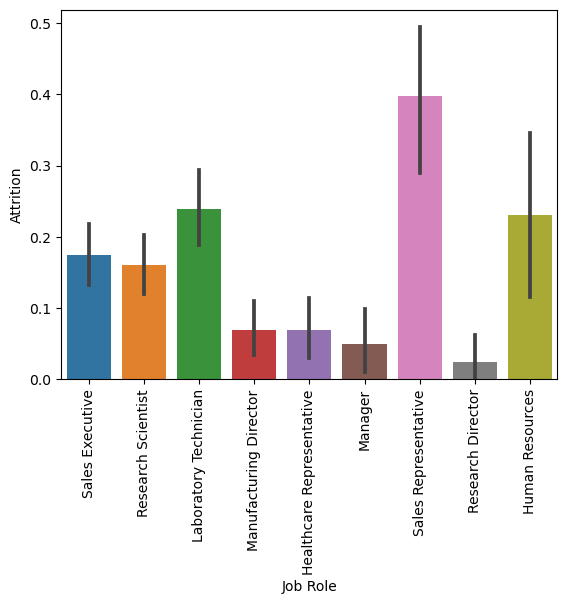

In [26]:
sns.barplot(x ='Job Role' ,y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Do certain job roles require more training compared to others, and does that affect attrition?

In [27]:
average_training = data.groupby('Job Role')['Training Times Last Year'].mean().reset_index(name ='Average Training').sort_values(by = ['Average Training'],ascending= False)

In [28]:
average_training

,Job Role,Average Training
8,Sales Representative,3.012048
2,Laboratory Technician,2.949807
7,Sales Executive,2.831288
3,Manager,2.813725
5,Research Director,2.775000
0,Healthcare Representative,2.748092
4,Manufacturing Director,2.744828
6,Research Scientist,2.664384
1,Human Resources,2.557692


In [29]:
job_attrition = data[data['Attrition'] == 1].groupby('Job Role').size().reset_index(name = 'job_attrition_count')
job_total_emp = data.groupby('Job Role').size().reset_index(name = 'total_emp')
merged_df = pd.merge(job_attrition,job_total_emp,on ='Job Role')
merged_df['attrition'] = (merged_df['job_attrition_count']*100.0)/ merged_df['total_emp']
result_df = merged_df.sort_values(by= 'attrition',ascending = False)
result_df[['Job Role','attrition']]

,Job Role,attrition
8,Sales Representative,39.759036
2,Laboratory Technician,23.938224
1,Human Resources,23.076923
7,Sales Executive,17.484663
6,Research Scientist,16.095890
4,Manufacturing Director,6.896552
0,Healthcare Representative,6.870229
3,Manager,4.901961
5,Research Director,2.500000


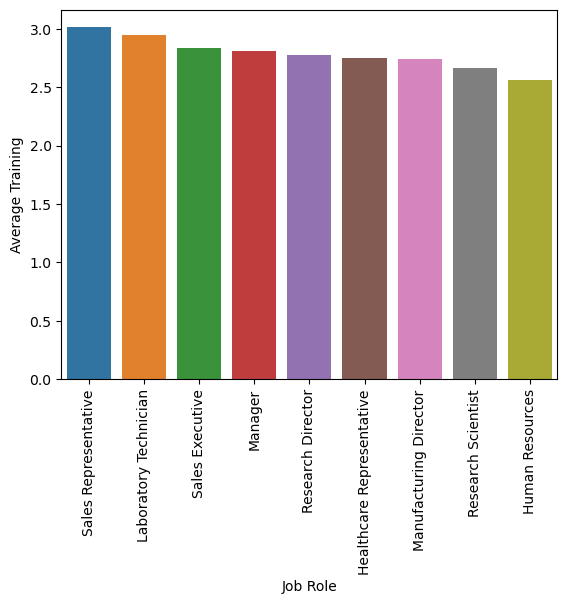

In [30]:
sns.barplot(x='Job Role',y = 'Average Training',data = average_training)
plt.xticks(rotation = 90)
plt.show()

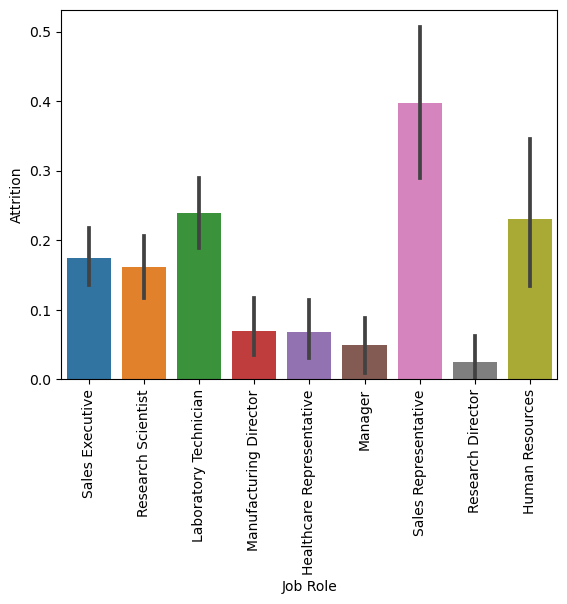

In [31]:
sns.barplot(x = 'Job Role',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Are there any patterns in overtime between different job roles?

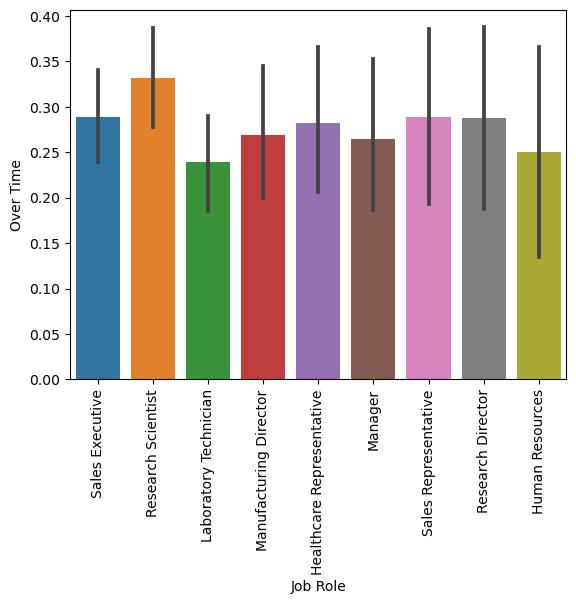

In [32]:
sns.barplot(x='Job Role',y = 'Over Time',data = data)
plt.xticks(rotation = 90)
plt.show()

## 4.	Employee Performance and Satisfaction:

### ●	Is there a relationship between performance ratings and attrition rates?

In [33]:
correlation_coefficient = np.corrcoef(data['Performance Rating'], data['Attrition'] )
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: [[1.         0.00288875]
 [0.00288875 1.        ]]


### performance ratings do not significantly affect attrition rates. This could imply that other factors might be more influential in determining why employees leave the company.

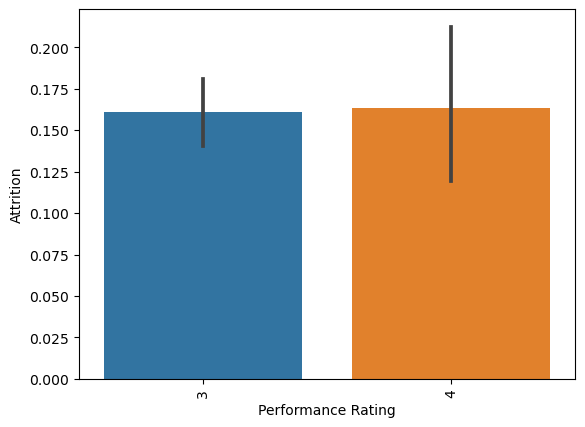

In [34]:
sns.barplot(x='Performance Rating',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	How does employee satisfaction (environment satisfaction, job satisfaction, relationship satisfaction) impact attrition?

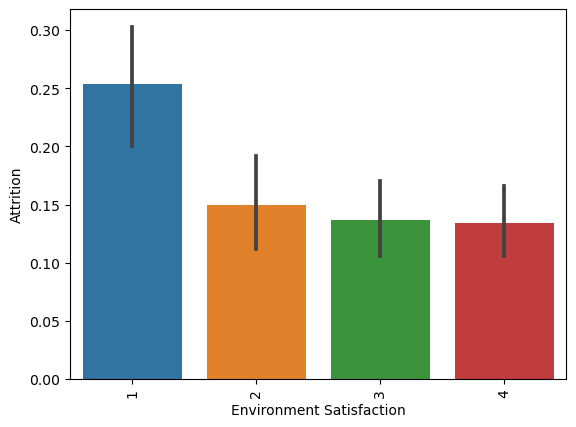

In [35]:
sns.barplot(x='Environment Satisfaction',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

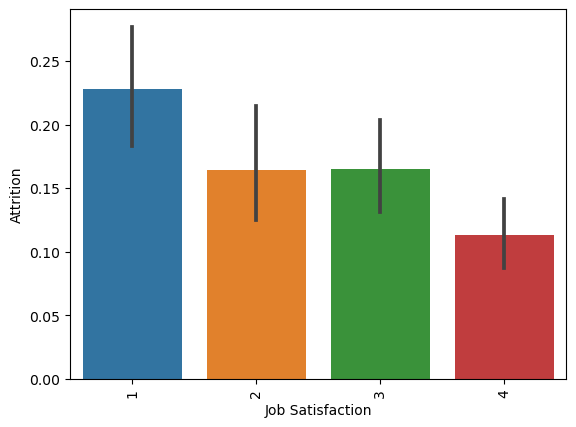

In [36]:
sns.barplot(x='Job Satisfaction',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

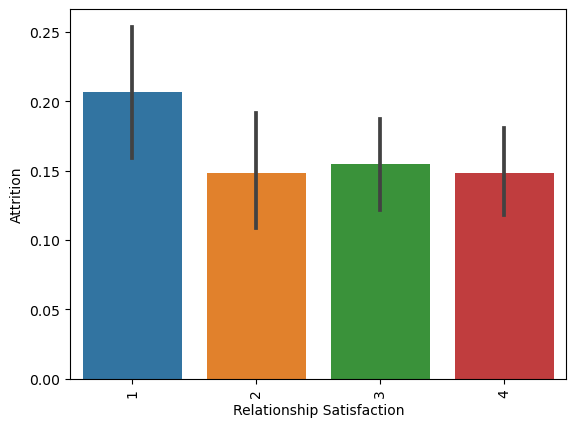

In [37]:
sns.barplot(x='Relationship Satisfaction',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Does the number of training times in the last year affect performance ratings or job satisfaction?

In [38]:
correlation_coefficient = np.corrcoef(data['Training Times Last Year'], data['Performance Rating'] )
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: [[ 1.         -0.01557888]
 [-0.01557888  1.        ]]


### training times in the last year and performance ratings. Specifically, the value -0.01557888 suggests that there is almost no linear relationship between these two

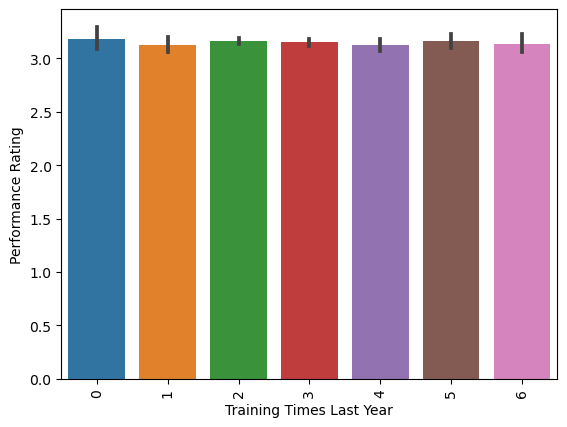

In [39]:
sns.barplot(x='Training Times Last Year',y = 'Performance Rating',data = data)
plt.xticks(rotation = 90)
plt.show()

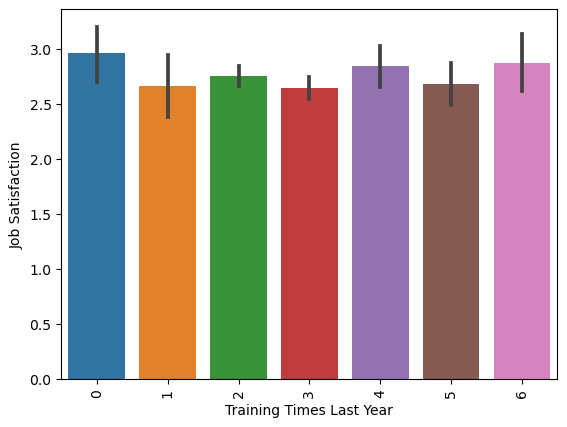

In [40]:
sns.barplot(x='Training Times Last Year',y = 'Job Satisfaction',data = data)
plt.xticks(rotation = 90)
plt.show()

In [41]:
correlation_coefficient = np.corrcoef(data['Training Times Last Year'], data['Job Satisfaction'] )
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: [[ 1.         -0.00577933]
 [-0.00577933  1.        ]]


### The correlation coefficient matrix indicates a very weak negative correlation between the number of training times in the last year and job satisfaction. Specifically, the value -0.00577933 suggests that there is almost no linear relationship between these two variables.

## 5.	Work-Life Balance and Employee Tenure:

### ●	Does work-life balance impact the number of years an employee stays with the company?

In [42]:
correlation_coefficient = np.corrcoef(data['Work Life Balance'], data['Years At Company'] )
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: [[1.         0.01208919]
 [0.01208919 1.        ]]


### the Work Life Balance and Years At Company. Specifically, the value -0.00577933 suggests that there is almost no linear relationship between these two variables

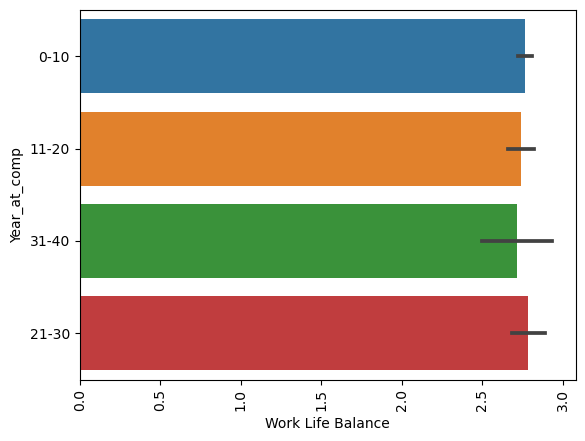

In [43]:
def map_years(year):
    if 0 <= year <= 10:
        return '0-10'
    elif 11 <= year <= 20:
        return '11-20'
    elif 21 <= year <= 30:
        return '21-30'
    elif 31 <= year <= 40:
        return '31-40'
    else:
        return 'Other'

data['Year_at_comp'] = data['Total Working Years'].apply(map_years)

sns.barplot(x='Work Life Balance',y = 'Year_at_comp',data = data)
plt.xticks(rotation = 90)
plt.show()

## 6.	Compensation and Attrition:

### ●	Is there a difference in attrition rates based on the distance from home or daily rate of employees?


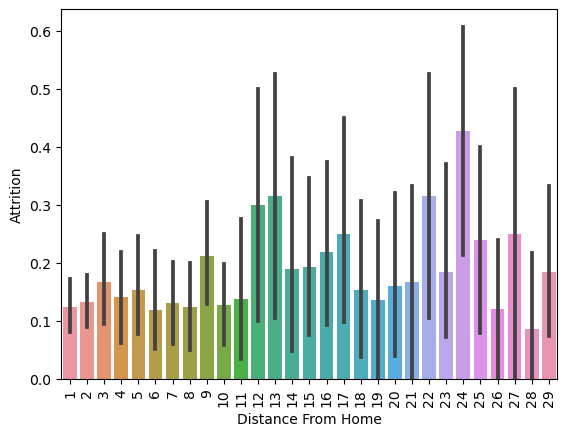

In [44]:
sns.barplot(x='Distance From Home',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

In [45]:
filters = data.groupby('Attrition')['Daily Rate'].mean().reset_index(name = 'avg_daily_rate')
filters

,Attrition,avg_daily_rate
0,0,812.504461
1,1,750.362869


In [46]:
attrition = data[data['Attrition']==1]['Daily Rate'].reset_index(name = 'daily_rates_1')
no_attrition =data[data['Attrition']==0]['Daily Rate'].reset_index(name = 'daily_rates_0')
no_attrition['daily_rates_0']

0        279
1       1392
2        591
3       1005
4       1324
        ... 
1228     898
1229     155
1230     783
1231    1440
1232    1157
Name: daily_rates_0, Length: 1233, dtype: int64

In [47]:
_,p_value=stats.ttest_ind(a = attrition['daily_rates_1'],b = no_attrition['daily_rates_0'],equal_var= False)

In [48]:
if p_value < 0.05:
    print('we are rejecting null hypothesis there is no difference')
    print('That mean we are accepting alternative there is a difference')
else:
    print('we are accepting null hypothesis there is difference')

we are rejecting null hypothesis there is no difference
That mean we are accepting alternative there is a difference


### ●	How does monthly income or salary hikes influence attrition?

In [49]:
correlation = data['Monthly Income'].corr(data['Attrition'])
print(f"The correlation coefficient between Monthly Income and Attrition is: {correlation}")

The correlation coefficient between Monthly Income and Attrition is: -0.1598395823849884


### As monthly income increases, there is a slight tendency for attrition rates to decrease. However, this relationship is not very strong, and other factors likely play a more significant role in determining attrition.

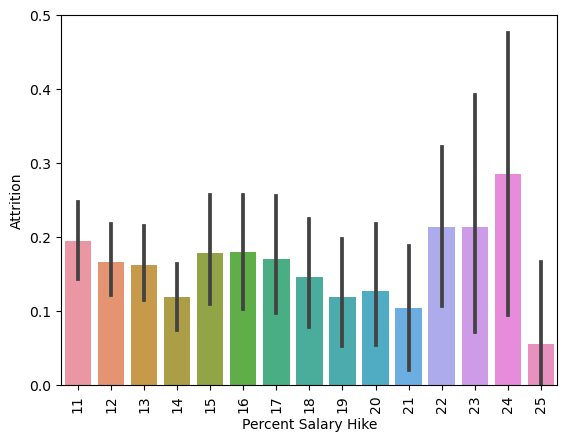

In [50]:
sns.barplot(x='Percent Salary Hike',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

In [51]:
correlations = data['Percent Salary Hike'].corr(data['Attrition'])
print(f"The correlation coefficient between Percent Salary Hike and Attrition is: {correlations}")

The correlation coefficient between Percent Salary Hike and Attrition is: -0.013478202057439163


### There is almost no association between percent salary hike and attrition rates. Changes in salary hike do not significantly impact attrition in this dataset.

## 7.	Promotion and Career Development:

### ●	Are employees who stay longer with the company more likely to get promotions?


In [52]:
correlationss = data['Years Since Last Promotion'].corr(data['Years At Company'])
print(f"The correlation coefficient between Years Since Last Promotion and Years At Company is: {correlationss}")

The correlation coefficient between Years Since Last Promotion and Years At Company is: 0.6184088652176053


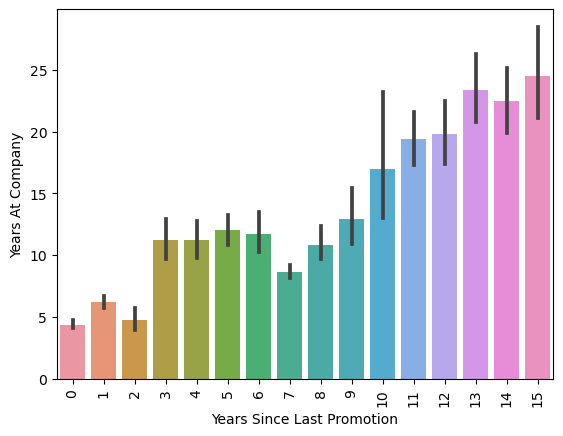

In [53]:
sns.barplot(x='Years Since Last Promotion',y = 'Years At Company',data = data)
plt.xticks(rotation = 90)
plt.show()

### The correlation coefficient between Years Since Last Promotion and Years At Company is approximately 0.62. This positive correlation suggests that as the number of years since an employee’s last promotion increases, their tenure at the company also tends to increase.

### In other words, employees who have been with the company for a longer time since their last promotion are more likely to stay with the organization

### ●	Does the number of years in the current role affect attrition rates?

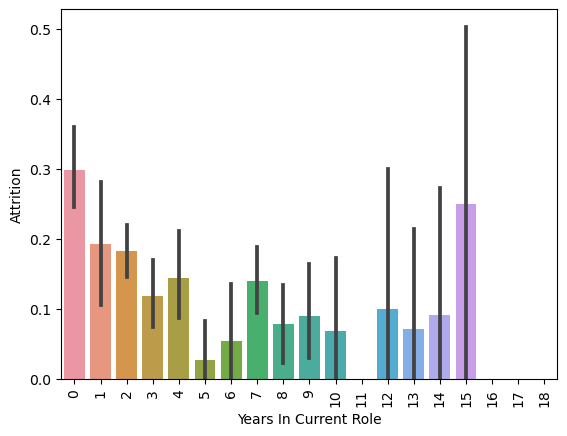

In [54]:
sns.barplot(x='Years In Current Role',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

In [55]:
correlation_current_role = data['Years In Current Role'].corr(data['Attrition'])
print(f"The correlation coefficient between Years In Current Role and Attrition is: {correlation_current_role}")

The correlation coefficient between Years In Current Role and Attrition is: -0.16054500426770085


 ### The correlation is relatively weak, implying that the number of years in the current role is not a strong predictor of attrition by itself. Other factors might also play a significant role in an employee’s decision to stay or leave.

## 8.	Departmental Analysis:

### ●	Is there a particular department with consistently high or low attrition rates?


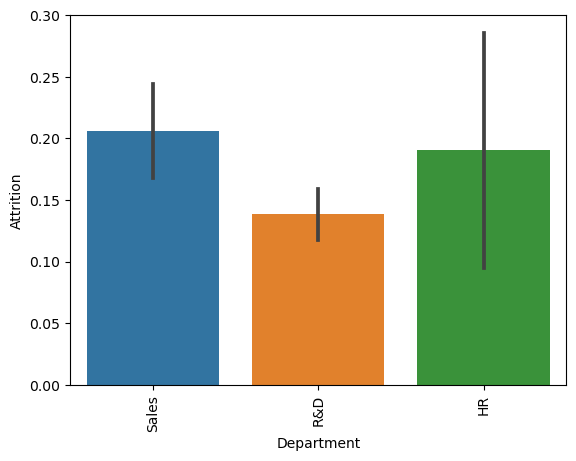

In [56]:
sns.barplot(x = 'Department',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Are there any trends in the relationship between employee education level and department?

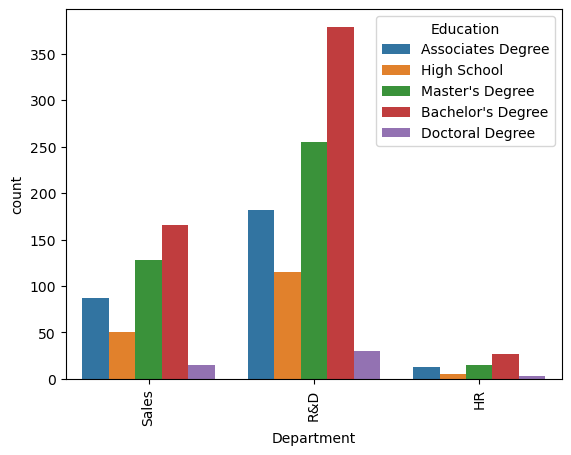

In [57]:
sns.countplot(x = 'Department',data = data,hue = 'Education')
plt.xticks(rotation = 90)
plt.show()

## 9.	Work Environment and Job Satisfaction:

### ●	How does the work environment satisfaction impact job satisfaction and, in turn, attrition?


In [58]:
correlation_satisfaction = data['Environment Satisfaction'].corr(data['Job Satisfaction'])
print(f"The correlation coefficient between Environment Satisfaction and Job Satisfaction is: {correlation_satisfaction}")

The correlation coefficient between Environment Satisfaction and Job Satisfaction is: -0.006784352599075113


### The correlation coefficient between Environment Satisfaction and Job Satisfaction is approximately -0.007, which is very close to zero. This suggests that there is no significant linear relationship between the two variables
### Work environment satisfaction alone does not strongly predict job satisfaction.

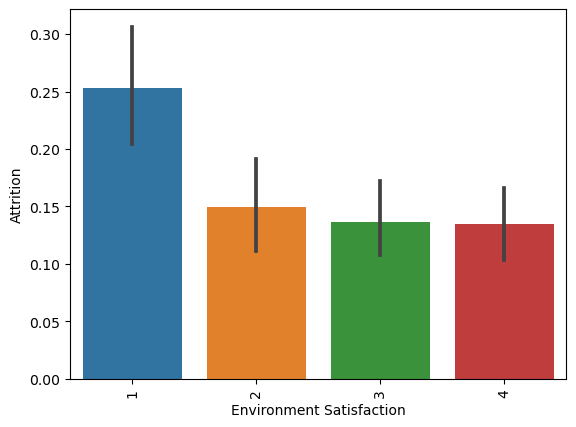

In [59]:
sns.barplot(x = 'Environment Satisfaction',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

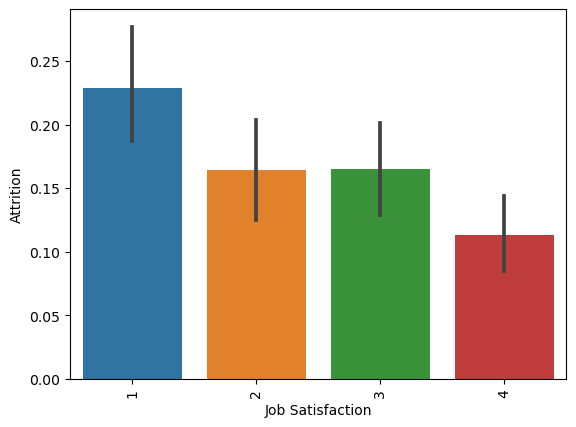

In [60]:
sns.barplot(x = 'Job Satisfaction',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

### ●	Is there any relationship between job involvement and attrition?

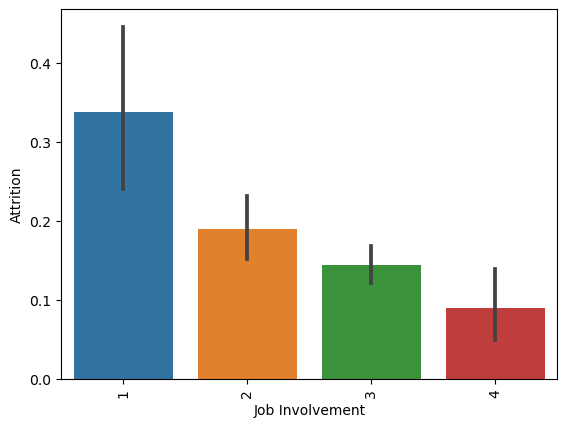

In [61]:
sns.barplot(x = 'Job Involvement',y = 'Attrition',data = data)
plt.xticks(rotation = 90)
plt.show()

In [62]:
correlation_involvement = data['Job Involvement'].corr(data['Attrition'])
print(f"The correlation coefficient between Job Involvement and Attrition is: {correlation_involvement}")

The correlation coefficient between Job Involvement and Attrition is: -0.13001595678605302


### weak negative correlation. In practical terms, this means that as Job Involvement increases (employees become more involved in their work), Attrition tends to decrease slightly. Conversely, when Job Involvement decreases, Attrition may increase slightly.